In [1]:
import numpy as np
import qiskit
from qiskit import *
from scipy.optimize import minimize

qiskit.__qiskit_version__

{'qiskit-terra': '0.17.4', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.13.1', 'qiskit-aqua': '0.9.1', 'qiskit': '0.26.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

# Various Trial Quantum State Preparation

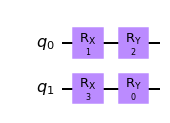

In [2]:
def vqe_circuit(parameters, ansatz):
    '''
    Create the quantum circuit for optimization
    '''
    circuit = QuantumCircuit(2)
    # quantum state preparation
    circuit = ansatz(circuit=circuit, parameters=parameters)
    circuit.measure_all()
    return circuit

def ansatz1(circuit, parameters):
    '''
    Quantum state preparation
    '''
    assert len(parameters) == 4, 'length of the parameters has to be 4'
    
    circuit.rx(parameters[0], 0)
    circuit.ry(parameters[1], 0)
    circuit.rx(parameters[2], 1)
    circuit.ry(parameters[3], 1)
    
    return circuit
circuit = qiskit.QuantumCircuit(2)
ansatz1(circuit, [1,2,3,0]).draw(output='mpl')

In [3]:
# vqe_circuit([1,2,3,0], ansatz=ansatz1).draw(output='mpl')

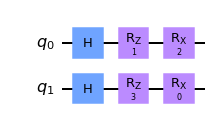

In [4]:
def ansatz2(circuit, parameters):
    '''
    Quantum state preparation
    '''
    assert len(parameters) == 4, 'length of the parameters has to be 4'
    
    circuit.h(0)
    circuit.rz(parameters[0], 0)
    circuit.rx(parameters[1], 0)
    circuit.h(1)
    circuit.rz(parameters[2], 1)
    circuit.rx(parameters[3], 1)
    
    return circuit
circuit = qiskit.QuantumCircuit(2)
ansatz2(circuit, [1,2,3,0]).draw(output='mpl')

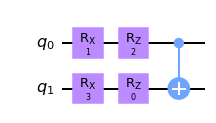

In [5]:
def ansatz3(circuit, parameters):
    '''
    Quantum state preparation
    '''
    assert len(parameters) == 4, 'length of the parameters has to be 4'
    
    circuit.rx(parameters[0], 0)
    circuit.rz(parameters[1], 0)
    circuit.rx(parameters[2], 1)
    circuit.rz(parameters[3], 1)
    circuit.cx(0, 1)
    
    return circuit
circuit = qiskit.QuantumCircuit(2)
ansatz3(circuit, [1,2,3,0]).draw(output='mpl')

# Calulating Expectation of Hamiltonian

In [6]:
def expectation(parameters, vqe_circuit, ansatz):
    shots = 2**14 # number of samples used for statistics
    circuit = vqe_circuit(parameters=parameters,ansatz=ansatz)
    
    # run the circuit and get the number of samples that output each bit value
    backend = BasicAer.get_backend('qasm_simulator')
    counts = execute(circuit, backend, shots=shots).result().get_counts()
    
    # calculate the probabilities for each computational basis
    probs = {}
    for output in ['00','01', '10', '11']:
        if output in counts:
            probs[output] = counts[output] / shots
        else:
            probs[output] = 0
    expectation_hamiltonian = probs['00'] - probs['01'] - probs['10'] + probs['11']
    return expectation_hamiltonian

# expectation(parameters=[0,1,2,3], vqe_circuit=vqe_circuit, ansatz=ansatz1)

# Solution using Ansatz1

In [7]:
initial_parameters = np.array([0,0,0,0])
tol = 1e-3 # tolerance for optimization precision.

vqe_result = minimize(expectation, initial_parameters, args = (vqe_circuit, ansatz1),
                      method="Powell", tol=tol)
print(f'The estimated minimum energy from VQE algorithm is: {vqe_result.fun}')
print(f'with value of the parameters: {vqe_result.x}')

The estimated minimum energy from VQE algorithm is: -1.0
with value of the parameters: [ 3.14708789  0.00330332 -0.00416515  0.0068585 ]


# Solution using Ansatz2

In [8]:
initial_parameters = np.array([0,0,0,0])
tol = 1e-3 # tolerance for optimization precision.

vqe_result = minimize(expectation, initial_parameters, args = (vqe_circuit, ansatz2),
                      method="Powell", tol=tol)
print(f'The estimated minimum energy from VQE algorithm is: {vqe_result.fun}')
print(f'with value of the parameters: {vqe_result.x}')

The estimated minimum energy from VQE algorithm is: -0.9998779296875
with value of the parameters: [-1.57813544 -1.54921857 -1.56892754  1.56316201]


# Solution using Ansatz3

In [9]:
initial_parameters = np.array([0,0,0,0])
tol = 1e-3 # tolerance for optimization precision.

vqe_result = minimize(expectation, initial_parameters, args = (vqe_circuit, ansatz3),
                      method="Powell", tol=tol)
print(f'The estimated minimum energy from VQE algorithm is: {vqe_result.fun}')
print(f'with value of the parameters: {vqe_result.x}')

The estimated minimum energy from VQE algorithm is: -1.0
with value of the parameters: [4.14924316 0.91317521 3.12979367 0.6295706 ]
